In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
path='features.xlsx'  #give path where extracted features are saved

In [9]:
abc=pd.read_excel(path,header=None)
abc.head()


,0,1,2,3,4,5,6
0,NaN,contrast,dissimilarity,homogeneity,ASM,energy,Label
1,0.0,12769357,562393,2747.88,312782,559.269,0
2,1.0,9580203,482361,3308,289038,537.623,0
3,2.0,10928946,517098,3084.55,337650,581.077,0
4,3.0,12465011,556457,2776.65,372854,610.618,0


In [3]:
X=np.array((abc.as_matrix())[1:,1:])
Y=X[:,5]
X=X[:,0:5]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
# model=KNeighborsClassifier()

C:\Users\thaqu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [4]:

K_value = 3
neigh = KNeighborsClassifier(n_neighbors=K_value, weights='uniform', algorithm='auto')
neigh.fit(X_train, y_train)
testt=neigh.predict(X_test)
scoree=accuracy_score(y_test, testt)
print("KNN testing accuracy=",scoree*100)


KNN testing accuracy= 75.27777777777777


In [5]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [6]:

print("Accuracy: ",accuracy_score(y_test,testt))
print("#"*50)

print()

print("Classification Report: ")
print()
print(classification_report(y_test,testt))

Accuracy:  0.7527777777777778
##################################################

Classification Report: 

              precision    recall  f1-score   support

           0       0.69      0.91      0.79        57
           1       0.66      0.91      0.76        53
           2       0.83      0.65      0.73        68
           3       0.80      0.58      0.67        62
           4       0.83      0.92      0.88        53
           5       0.76      0.63      0.69        67

    accuracy                           0.75       360
   macro avg       0.76      0.77      0.75       360
weighted avg       0.77      0.75      0.75       360



In [8]:
cm=confusion_matrix(y_test,testt)
print(cm)

[[52  0  3  2  0  0]
 [ 0 48  0  1  0  4]
 [18  0 44  3  3  0]
 [ 4  5  4 36  5  8]
 [ 1  0  1  1 49  1]
 [ 0 20  1  2  2 42]]


Text(0.5, 257.44, 'Predicted label')

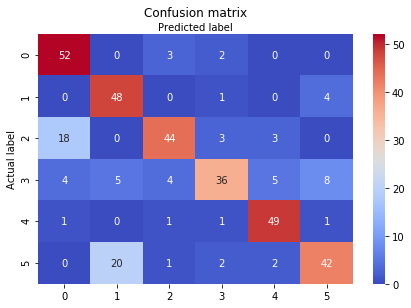

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1,2,3,4,5]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')